# CSIT552 Final Project
### Topic: Data Analytics with Python
### Submitted by : Shivaprasad Dubyala


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Task 0 (0 pts). Loading the netflix titles dataset.

In [2]:
%%sh
# Step 1: Download the Netflix titles dataset using wget
wget -O netflix_titles.csv https://msuweb.montclair.edu/~dongb/misc/netflix_titles.csv



--2024-05-05 22:52:29--  https://msuweb.montclair.edu/~dongb/misc/netflix_titles.csv
Resolving msuweb.montclair.edu (msuweb.montclair.edu)... 130.68.5.222
Connecting to msuweb.montclair.edu (msuweb.montclair.edu)|130.68.5.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/csv]
Saving to: ‘netflix_titles.csv’

     0K .......... .......... .......... .......... ..........  1%  243K 13s
    50K .......... .......... .......... .......... ..........  3%  724K 9s
   100K .......... .......... .......... .......... ..........  4%  374K 9s
   150K .......... .......... .......... .......... ..........  6%  736K 7s
   200K .......... .......... .......... .......... ..........  7%  720K 7s
   250K .......... .......... .......... .......... ..........  9%  753K 6s
   300K .......... .......... .......... .......... .......... 10%  737K 6s
   350K .......... .......... .......... .......... .......... 12%  739K 5s
   400K .......... .......... ..

In [3]:
netflix_titles_df = pd.read_csv("netflix_titles.csv")
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix_titles_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
netflix_titles_df.shape

(8807, 12)

In [7]:
netflix_titles_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Task 1 (10 pts). Data Cleaning.
## The duration column describes the length of the movie/show. The rule is as follows: if it is a movie, the duration is described in the number of minutes; if it is a TV show, it is described in the number of seasons. Find the records that do not follow the rule and fix the error.

In [8]:
incorrect_records = netflix_titles_df[
    ((netflix_titles_df['type'] == 'Movie') & (netflix_titles_df['duration'].str.contains('season', case=False))) |
    ((netflix_titles_df['type'] == 'TV Show') & (netflix_titles_df['duration'].str.contains('min', case=False))) |
    (netflix_titles_df['duration'].isnull())
]
print("Incorrect records:")
print(incorrect_records[['show_id', 'type', 'title', 'duration']])


Incorrect records:
     show_id   type                                 title duration
5541   s5542  Movie                       Louis C.K. 2017      NaN
5794   s5795  Movie                 Louis C.K.: Hilarious      NaN
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store      NaN


In [9]:
netflix_titles_df.drop(incorrect_records.index, axis=0, inplace=True)


In [10]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB


# Task 2 (20 pts). Data Transformation.

## Task 2.1 (10 pts). The country column includes a string that lists the countries where the movie/show was produced. In case of multiple countries, they are concatenated with commas. Replace this column with single country.

In [11]:
# Split multiple countries into a list and explode the DataFrame
netflix_titles_df['country'] = netflix_titles_df['country'].str.split(', ')
netflix_titles_df = netflix_titles_df.explode('country')

netflix_titles_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Task 2.2 (10 pts). The listed in column stores the movie/show categories. Similar to the country column, it may store multiple categories that are concatenated by comma. Similar to Task 1.1, create a new column named genre that stores a single category in each row.

In [12]:
# Split multiple countries into a list and explode the DataFrame
netflix_titles_df['genre'] = netflix_titles_df['listed_in'].str.split(', ')
netflix_titles_df = netflix_titles_df.explode('genre')

netflix_titles_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,International Movies


# Task 3 (70 pts). Data Aggregation & Visualization.

## Task 3.1 (10 pts). Count the total number of movies/shows by release year and draw a lineplot to show the number of movies/shows since 2000.

In [13]:
netflix_titles_df.groupby('release_year')['title'].nunique()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1031
2018    1147
2019    1030
2020     953
2021     592
Name: title, Length: 74, dtype: int64

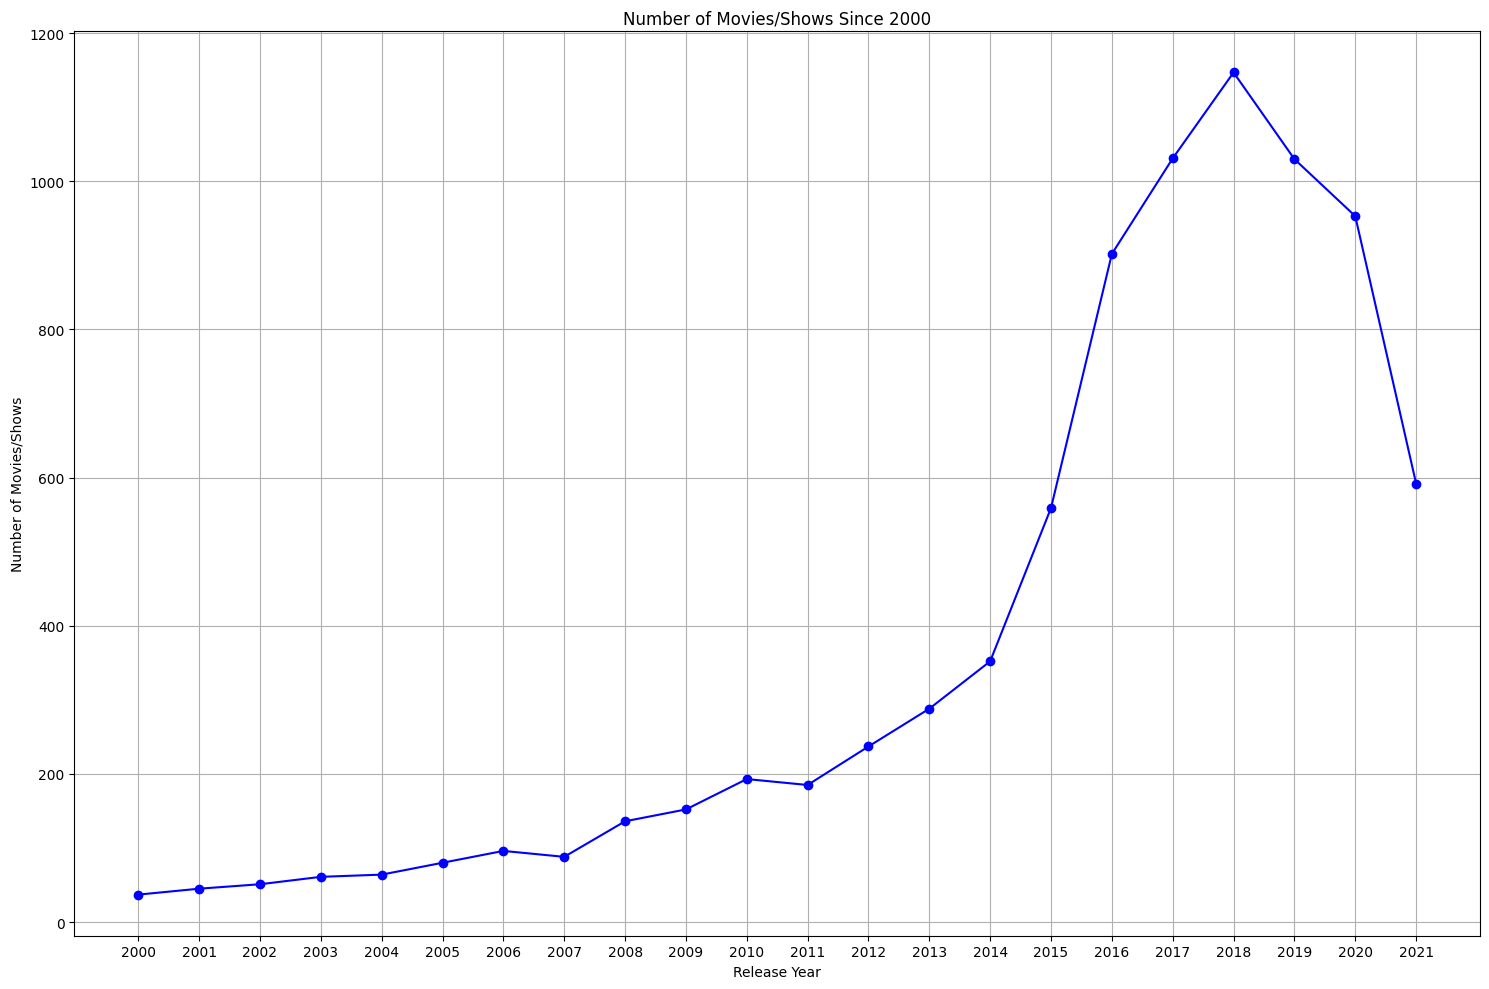

In [15]:
recent_movies_shows_df = netflix_titles_df[netflix_titles_df['release_year'] >= 2000]
movies_shows_count = recent_movies_shows_df.groupby('release_year')['title'].nunique()
plt.figure(figsize=(15, 10))
movies_shows_count.plot(kind='line', marker='o', color='b')
plt.title('Number of Movies/Shows Since 2000')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.grid(True)
plt.xticks(range(2000, max(recent_movies_shows_df['release_year']) + 1, 1))
plt.tight_layout()
plt.show()

## Task 3.2 (10 pts). Find the top-30 productive directors. The productivity of a director is measured by the number of movies/shows. Visualize the top-30 productive directors and their number of movies/shows with a barplot.

In [48]:
director_counts = netflix_titles_df.groupby('director')['title'].nunique()
director_counts.sort_values(ascending=False, inplace=True)
director_counts

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
                          ..
Jos Humphrey               1
Jose Gomez                 1
Jose Javier Reyes          1
Bill Oliver                1
Avgousta Zourelidi         1
Name: title, Length: 4527, dtype: int64

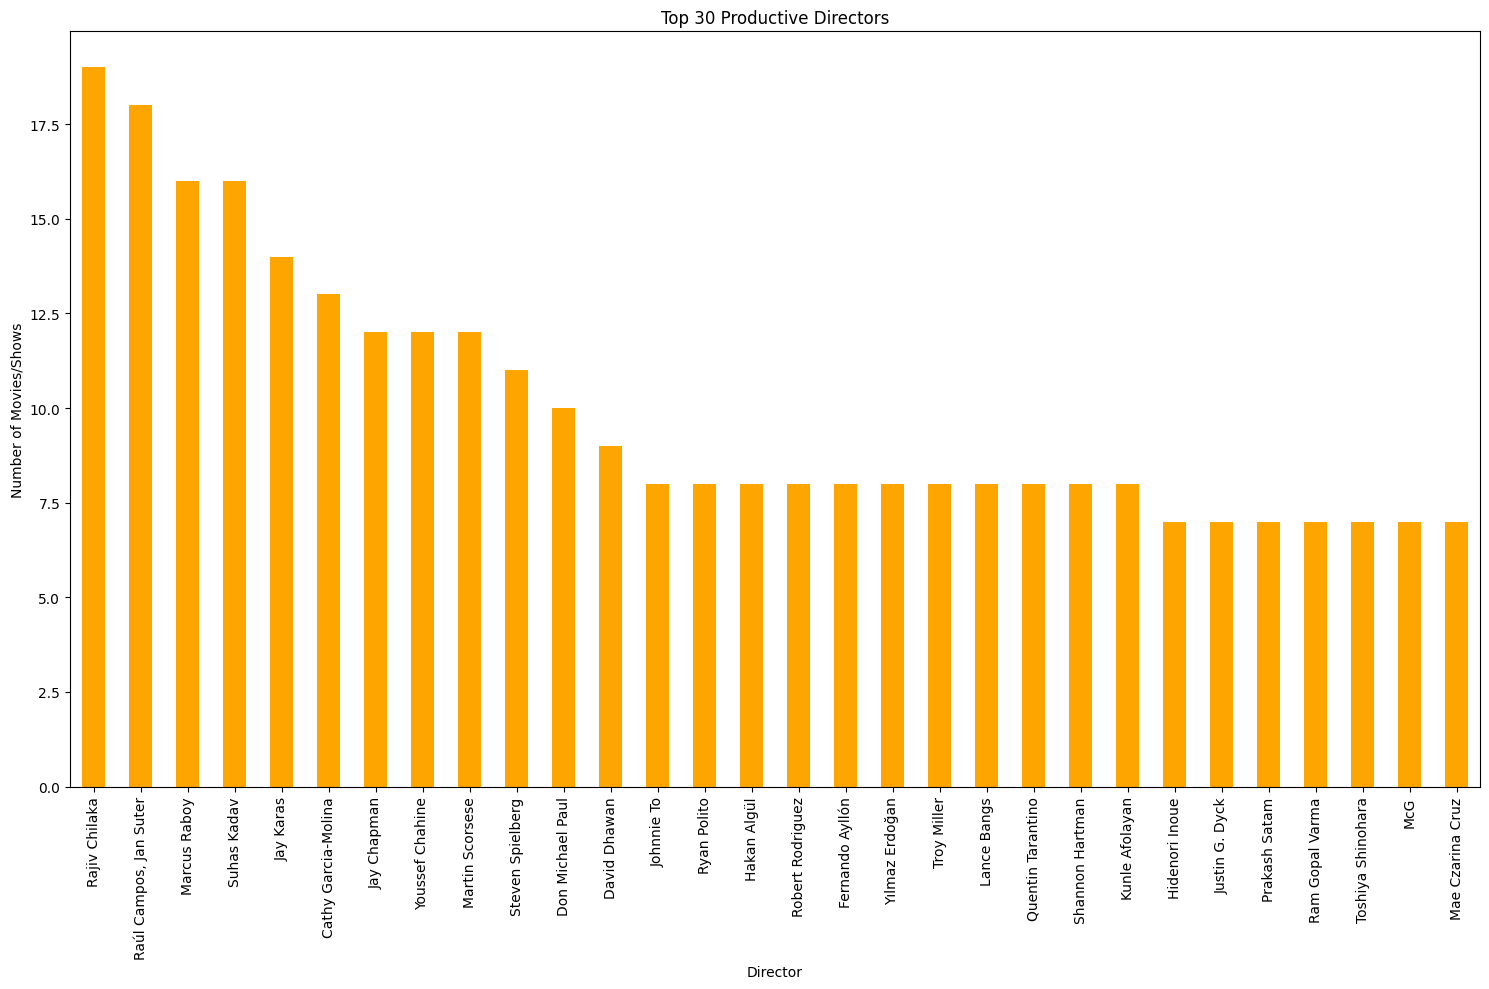

In [23]:
director_counts = netflix_titles_df.groupby('director')['title'].nunique()
director_counts.sort_values(ascending=False, inplace=True)
top_30_directors = director_counts.head(30)
plt.figure(figsize=(15, 10))
top_30_directors.plot(kind='bar', color='orange')
plt.title('Top 30 Productive Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies/Shows')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Task 3.3 (10 pts). Make a lineplot that shows the average movie length and 95% confidence interval for every year since 2000. (x-axis is the year, y-axis is the length in minutes).

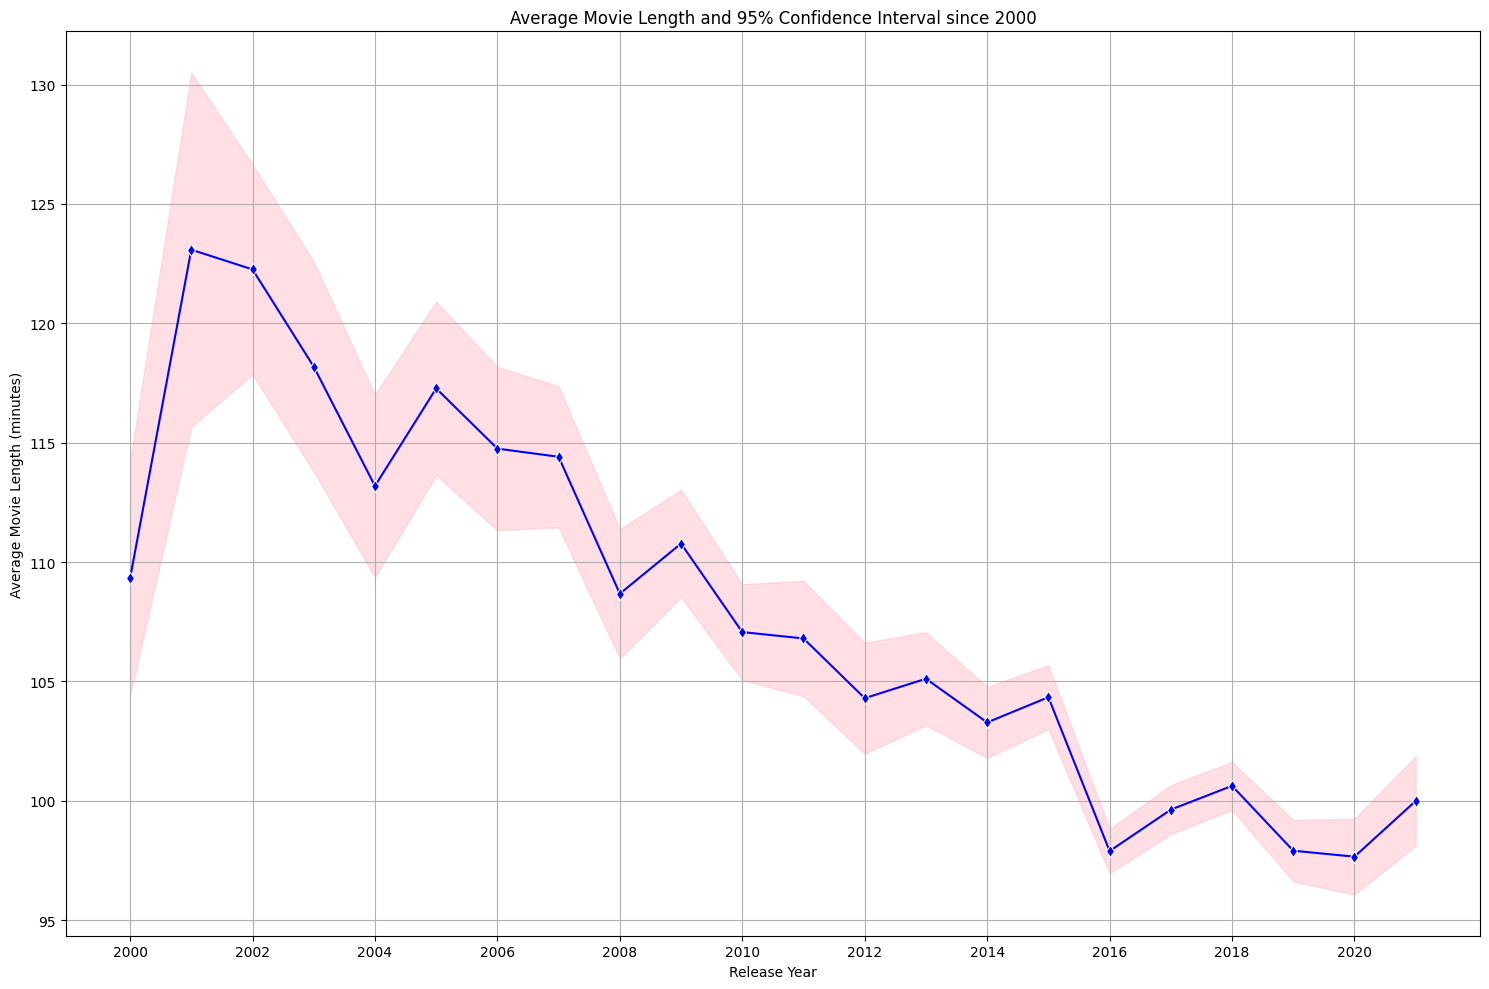

In [26]:
recent_movies_df = netflix_titles_df[(netflix_titles_df['type'] == 'Movie') & (netflix_titles_df['release_year'] >= 2000)]
average_length_per_year = recent_movies_df.groupby('release_year')['duration'].apply(lambda x: pd.to_numeric(x.str.extract('(\d+)')[0]).mean())
confidence_intervals = recent_movies_df.groupby('release_year')['duration'].apply(lambda x: pd.to_numeric(x.str.extract('(\d+)')[0]).sem() * 1.96)
plt.figure(figsize=(15, 10))
sns.lineplot(data=average_length_per_year, marker='d', color='b')
plt.fill_between(average_length_per_year.index, average_length_per_year - confidence_intervals, average_length_per_year + confidence_intervals, alpha=0.5, color='pink')
plt.title('Average Movie Length and 95% Confidence Interval since 2000')
plt.xlabel('Release Year')
plt.ylabel('Average Movie Length (minutes)')
plt.grid(True)
plt.xticks(range(2000, max(recent_movies_df['release_year']) + 1, 2))
plt.tight_layout()
plt.show()

## Task 3.4 (20 pts). Make a lineplot that shows the number of movies/shows produced every year since 2000 in each of the following countries (United States, India, United Kingdom, Japan, South Korea) respectively. (x-axis is the year, y-axis is the number of products, and each country has a line). Make sure that you add the legend.

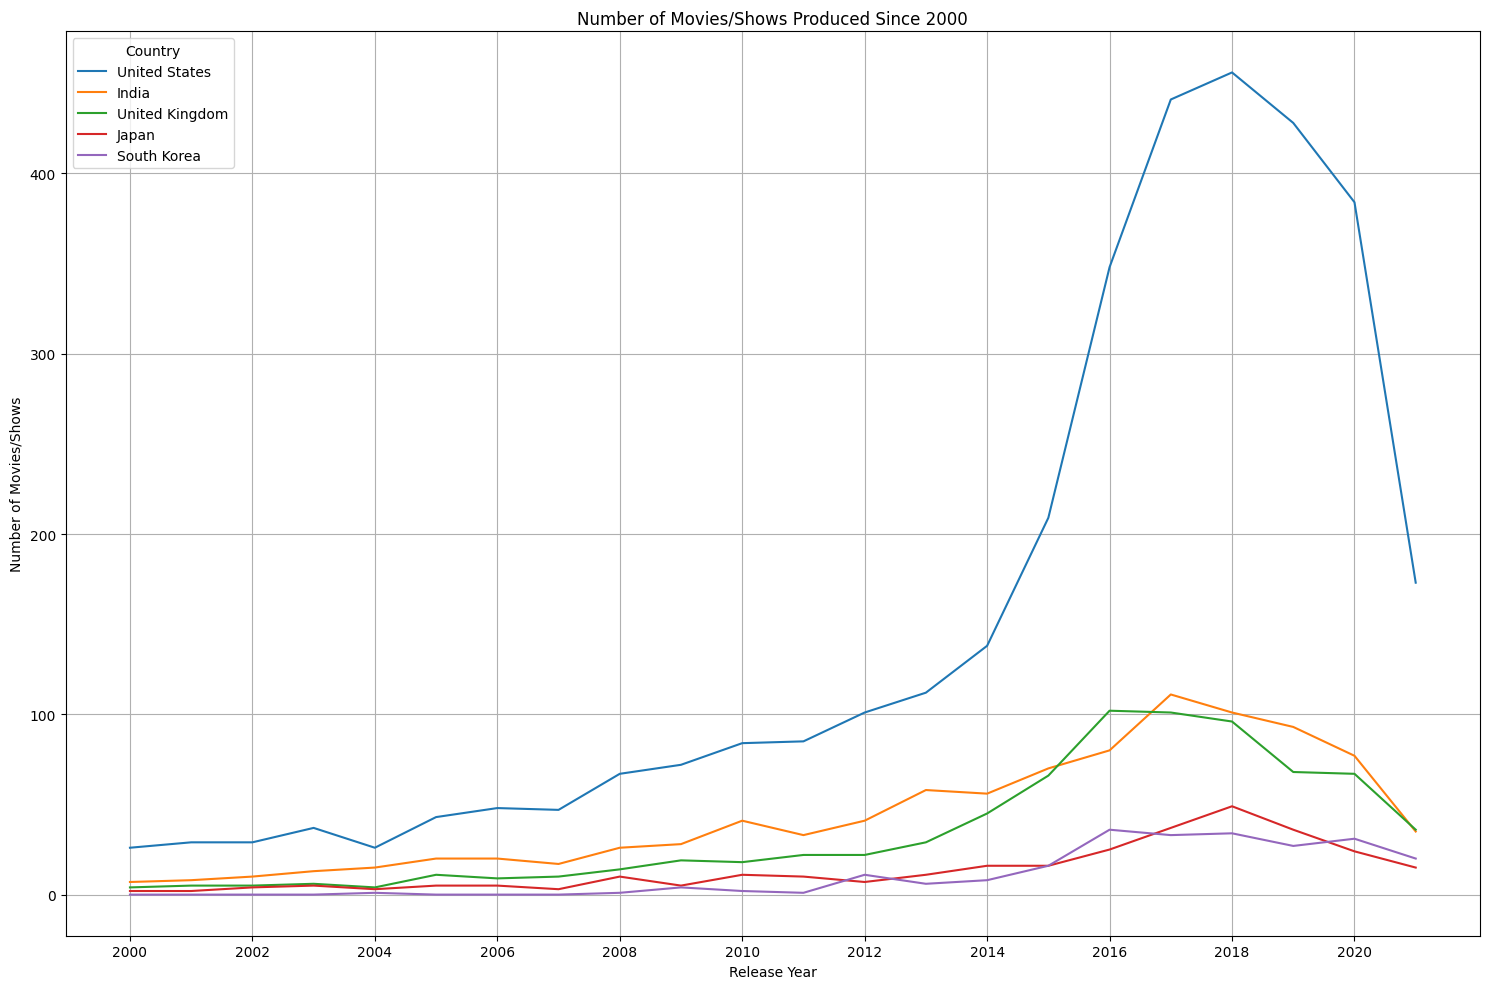

In [25]:
countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']
filtered_df = netflix_titles_df[(netflix_titles_df['release_year'] >= 2000) & (netflix_titles_df['country'].isin(countries))]
production_counts = filtered_df.groupby(['release_year', 'country'])['title'].nunique().unstack(fill_value=0)
plt.figure(figsize=(15, 10))
for country in countries:
    plt.plot(production_counts.index, production_counts[country], label=country)
plt.title('Number of Movies/Shows Produced Since 2000')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.legend(title='Country', loc='upper left')
plt.grid(True)
plt.xticks(range(2000, max(filtered_df['release_year']) + 1, 2))
plt.tight_layout()
plt.show()

## Task 3.5 (20 pts). Find all the countries that produced more than 50 movies/shows in history. Make a mapplot where each country is plotted on the map as a circle and annotated. The circle size is based on the number of movies/shows it produced.

<ipython-input-44-d6793ff3df88>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-44-d6793ff3df88>:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_map['area'] = world_map['geometry'].area


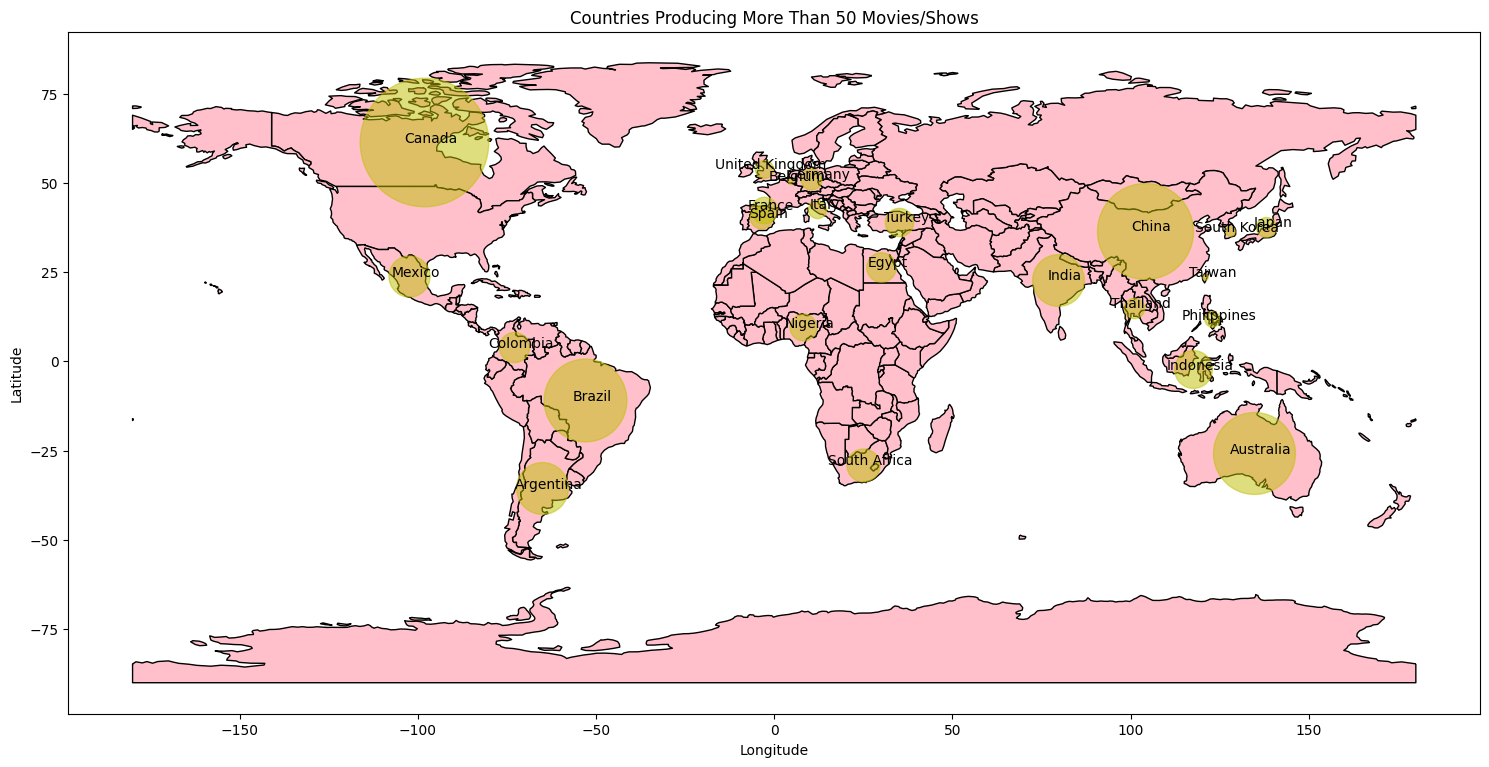

In [44]:
country_counts = netflix_titles_df.groupby('country')['title'].nunique()
countries_over_50 = country_counts[country_counts > 50].index.tolist()
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map['area'] = world_map['geometry'].area
plt.figure(figsize=(15, 10))
world_map.plot(ax=plt.gca(), color='pink', edgecolor='black')
for idx, row in world_map[world_map['name'].isin(countries_over_50)].iterrows():
    plt.annotate(text=row['name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 xytext=(5, 0), textcoords='offset points', ha='center')
    plt.scatter(x=row['geometry'].centroid.x, y=row['geometry'].centroid.y,
                s=row['area']*5, color='y', alpha=0.5)
plt.title('Countries Producing More Than 50 Movies/Shows')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

In [ ]:
pwd

'C:\\Users\\vnave\\Desktop\\python final'